11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 - 6s - 13ms/step - accuracy: 0.9010 - loss: 0.3489 - val_accuracy: 0.9615 - val_loss: 0.1462
Epoch 2/5
422/422 - 3s - 6ms/step - accuracy: 0.9588 - loss: 0.1423 - val_accuracy: 0.9705 - val_loss: 0.1044
Epoch 3/5
422/422 - 5s - 12ms/step - accuracy: 0.9718 - loss: 0.0968 - val_accuracy: 0.9750 - val_loss: 0.0867
Epoch 4/5
422/422 - 6s - 13ms/step - accuracy: 0.9785 - loss: 0.0734 - val_accuracy: 0.9753 - val_loss: 0.0864
Epoch 5/5
422/422 - 2s - 6ms/step - accuracy: 0.9829 - loss: 0.0581 - val_accuracy: 0.9715 - val_loss: 0.0968
✅ Test Accuracy: 96.99%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


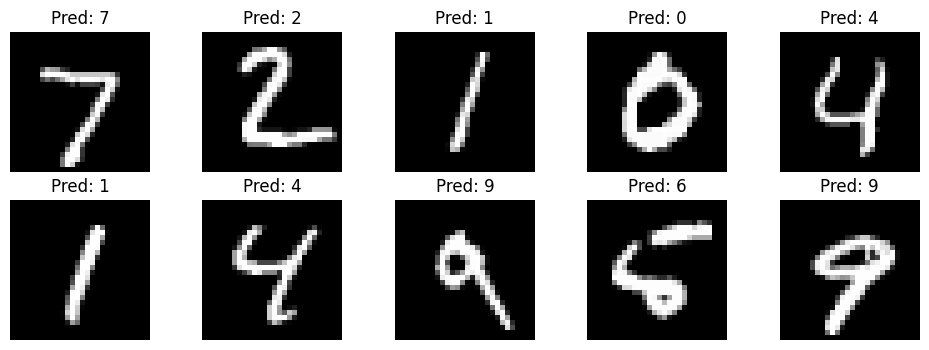

In [1]:
# Task 2: MNIST Digit Recognition

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Loading Dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing

X_train = X_train / 255.0   # Normalize pixels (0-1)
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encoding
y_test = to_categorical(y_test, 10)

# Build Model (MLP Neural Network)

model = Sequential([
    Flatten(input_shape=(28,28)),     # Flatten 28x28 → 784
    Dense(128, activation='relu'),    # Hidden layer
    Dense(64, activation='relu'),     # Hidden layer
    Dense(10, activation='softmax')   # Output layer (10 digits)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model

history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Evaluate

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

# Predict & Show Example

predictions = model.predict(X_test[:10])
plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis("off")
plt.show()
